In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Local file paths
file_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\selected_features_training_1.csv"  # Input file
train_output_path =r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\train_set.csv"  # Output train set
val_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\val_set.csv"  # Output validation set

# Load the data from the local CSV file
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Train-Test Split with Stratify
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the splits back to DataFrames for saving
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['IncidentGrade'] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val['IncidentGrade'] = y_val.values

# Save training and validation sets to local CSV files
df_train.to_csv(train_output_path, index=False)
df_val.to_csv(val_output_path, index=False)

print(f"Training set saved to {train_output_path} - Shape: {df_train.shape}")
print(f"Validation set saved to {val_output_path} - Shape: {df_val.shape}")

print("Data splitting complete!")

Training set saved to C:\Users\Elakkiya\Downloads\microsoft cybersecurity\train_set.csv - Shape: (3161313, 16)
Validation set saved to C:\Users\Elakkiya\Downloads\microsoft cybersecurity\val_set.csv - Shape: (790329, 16)
Data splitting complete!


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Local file paths
file_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\selected_features_testing_2_ordered.csv" # Input file
train_output_path =r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\test_set.csv"  # Output train set
val_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\validation_set.csv"  # Output validation set

# Load the data from the local CSV file
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Train-Test Split with Stratify
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the splits back to DataFrames for saving
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['IncidentGrade'] = y_train.values

df_val = pd.DataFrame(X_val, columns=X.columns)
df_val['IncidentGrade'] = y_val.values

# Save training and validation sets to local CSV files
df_train.to_csv(train_output_path, index=False)
df_val.to_csv(val_output_path, index=False)

print(f"Training set saved to {train_output_path} - Shape: {df_train.shape}")
print(f"Validation set saved to {val_output_path} - Shape: {df_val.shape}")

print("Data splitting complete!")

Training set saved to C:\Users\Elakkiya\Downloads\microsoft cybersecurity\test_set.csv - Shape: (3138156, 16)
Validation set saved to C:\Users\Elakkiya\Downloads\microsoft cybersecurity\validation_set.csv - Shape: (784539, 16)
Data splitting complete!


In [14]:
import pandas as pd

# File paths
train_output_path =r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\test_set.csv" 
val_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\validation_set.csv"  
# Load the datasets
train_data = pd.read_csv(train_output_path)
val_data = pd.read_csv(val_output_path)

# Print the shape of the datasets
print(f"Training dataset shape: {train_data.shape}")
print(f"Validation dataset shape: {val_data.shape}")

# Confirmation message
print("Datasets loaded successfully!")

Training dataset shape: (3138156, 16)
Validation dataset shape: (784539, 16)
Datasets loaded successfully!


Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Data sets are loaded.
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.82      0.66    326188
           1       0.28      0.07      0.11    173780
           2       0.66      0.58      0.62    284571

    accuracy                           0.57    784539
   macro avg       0.49      0.49      0.46    784539
weighted avg       0.53      0.57      0.52    784539

Logistic Regression Confusion Matrix:
[[268095  12521  45572]
 [121740  11448  40592]
 [101874  17369 165328]]


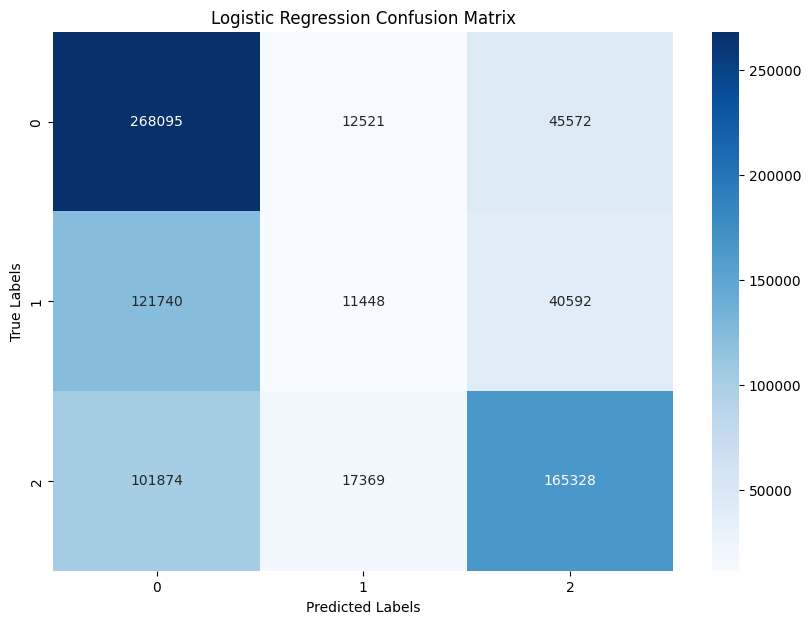

Logistic Regression model training and evaluation complete!


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
print(conf_matrix_log_reg)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression model training and evaluation complete!")

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Data sets are loaded.
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73    326188
           1       0.62      0.35      0.45    173780
           2       0.80      0.66      0.72    284571

    accuracy                           0.68    784539
   macro avg       0.68      0.63      0.64    784539
weighted avg       0.69      0.68      0.67    784539

Decision Tree Confusion Matrix:
[[284951  19432  21805]
 [ 87969  61167  24644]
 [ 77991  18491 188089]]


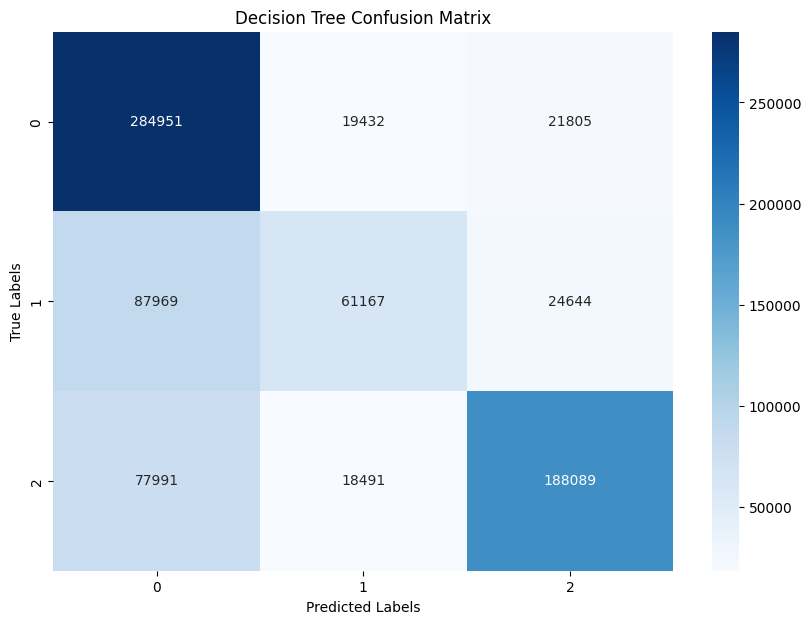

Decision Tree model training and evaluation complete!


In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree model training and evaluation complete!")

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 4.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.8min
[CV] END max_depth=None, min_sample

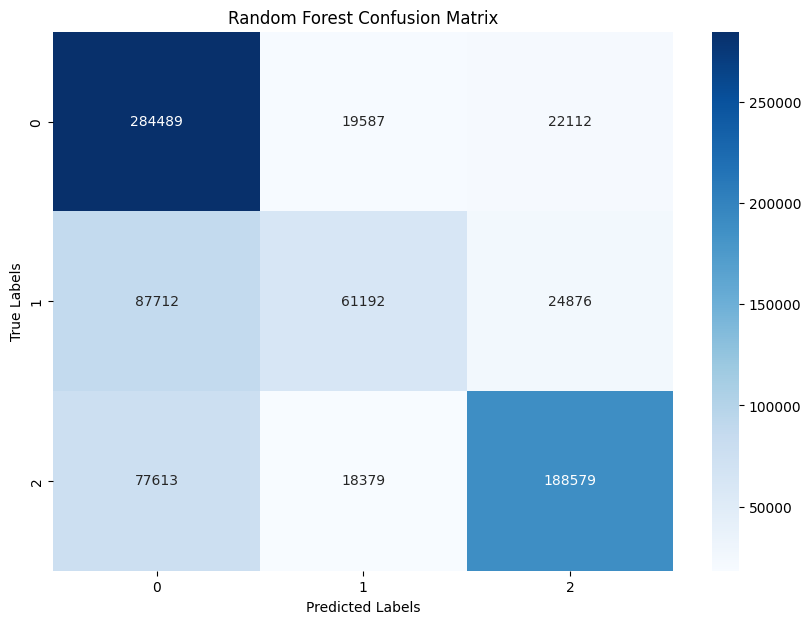

Random Forest model training and evaluation complete!


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=3,  # Number of parameter settings to sample
    cv=3, 
    n_jobs=1, 
    verbose=2, 
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf.predict(X_val)

print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("Random Forest Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest model training and evaluation complete!")

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Cross-validation scores: [0.67222672 0.67288423 0.67237437 0.6728189  0.67175458]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73    326188
           1       0.67      0.27      0.39    173780
           2       0.83      0.63      0.72    284571

    accuracy                           0.67    784539
   macro avg       0.70      0.61      0.61    784539
weighted avg       0.70      0.67      0.65    784539

Confusion Matrix:
[[301612   9177  15399]
 [104877  46983  21920]
 [ 91596  13478 179497]]


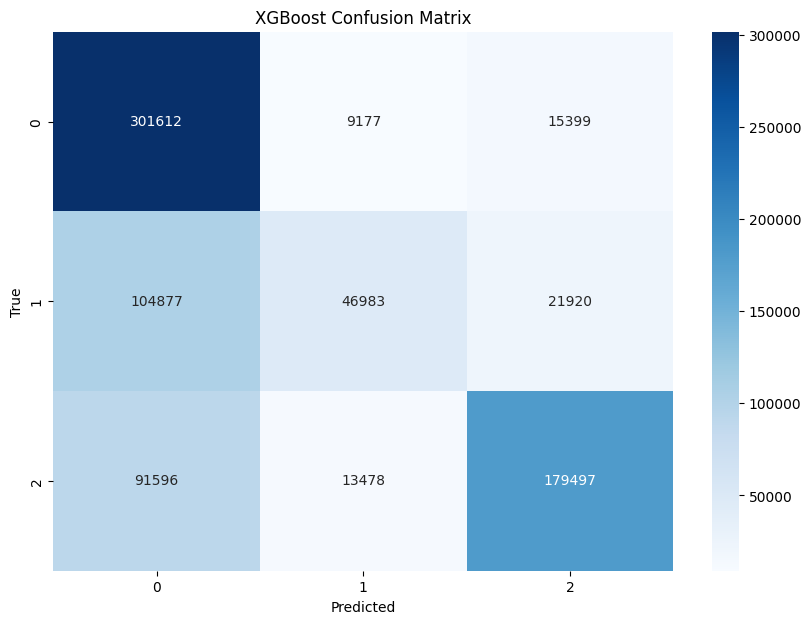

In [18]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# XGBoost with Random Search for Hyperparameter Tuning
param_dist = {'n_estimators': [50], 'max_depth': [10], 'learning_rate': [0.1]}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=3, cv=3, verbose=1, n_jobs=1)
random_search.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

# Prediction
y_pred_xgb = random_search.best_estimator_.predict(X_val)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Epoch 1/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6220 - loss: 0.8074 - val_accuracy: 0.6557 - val_loss: 0.7384
Epoch 2/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6540 - loss: 0.7344 - val_accuracy: 0.6592 - val_loss: 0.7266
Epoch 3/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6583 - loss: 0.7262 - val_accuracy: 0.6619 - val_loss: 0.7223
Epoch 4/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6605 - loss: 0.7221 - val_accuracy: 0.6612 - val_loss: 0.7260
Epoch 5/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6617 - loss: 0.7195 - val_accuracy: 0.6648 - val_loss: 0.7155
Epoch 6/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6623 - loss: 0.7176 - val_accuracy: 0.6628 - val_loss: 0.7228
Epoch 7/25
5517/5517 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6632 - loss: 0.7162 - val_accuracy: 0.6629 - val_loss:

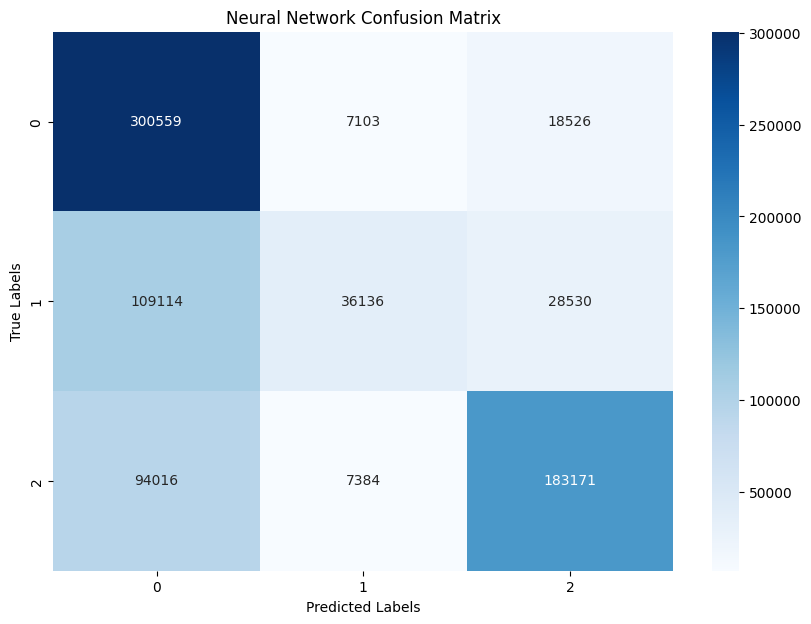

Neural Network model training and evaluation complete!


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Scaling for Neural Network
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert target to categorical
num_classes = y_train.nunique()
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# Build Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Train Neural Network with early stopping and reduced epochs
model.fit(X_train_scaled, y_train_cat, epochs=25, batch_size=512, 
          validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Predict and evaluate
y_pred_cat = model.predict(X_val_scaled)
y_pred = y_pred_cat.argmax(axis=1)

print("Neural Network Classification Report:")
print(classification_report(y_val, y_pred))

print("Neural Network Confusion Matrix:")
conf_matrix_nn = confusion_matrix(y_val, y_pred)
print(conf_matrix_nn)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Neural Network Confusion Matrix")
plt.show()

print("Neural Network model training and evaluation complete!")

Training data loaded with shape: (3161313, 15), Validation data loaded with shape: (790329, 15)
Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Elakkiya\Documents\Custom Office Templates\envs\myenv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67    340688
           1       0.42      0.61      0.50    172048
           2       0.79      0.57      0.66    277593

    accuracy                           0.62    790329
   macro avg       0.63      0.62      0.61    790329
weighted avg       0.66      0.62      0.63    790329

Balanced Random Forest Confusion Matrix:
[[226140  86031  28517]
 [ 52278 105116  14654]
 [ 60815  57825 158953]]


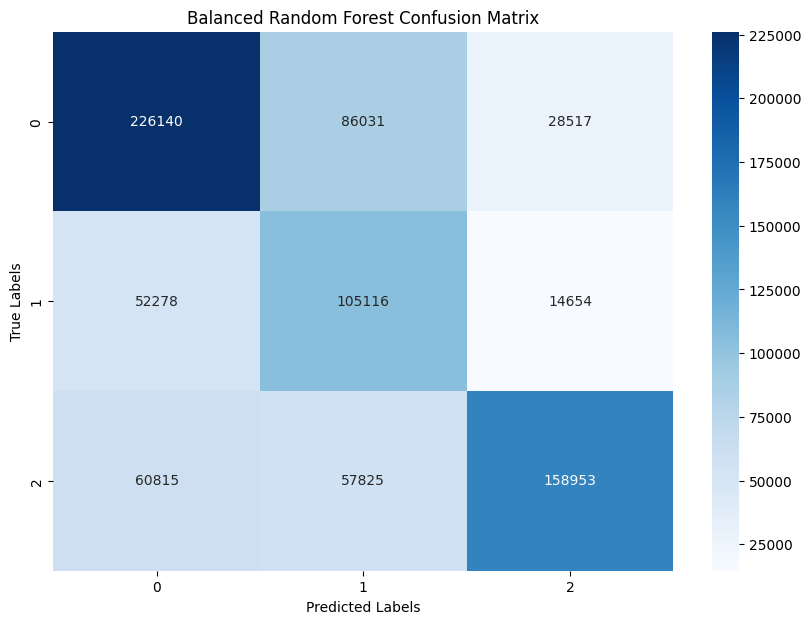

Best model saved to C:\Users\Elakkiya\Downloads\microsoft cybersecurity\best_rf_balanced_model.pkl


In [1]:
import pandas as pd
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# File paths
train_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\train_set.csv"
val_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\val_set.csv"

# Load the datasets
train_data = pd.read_csv(train_output_path)
val_data = pd.read_csv(val_output_path)

# Separate features and target
X_train = train_data.drop(columns=['IncidentGrade'])
y_train = train_data['IncidentGrade']
X_val = val_data.drop(columns=['IncidentGrade'])
y_val = val_data['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']  # Updated to compatible option
}

# Initialize BalancedRandomForestClassifier
rf_balanced = BalancedRandomForestClassifier(
    random_state=42,
    sampling_strategy='all',  # Set to future default behavior
    replacement=True,         # Set to future default behavior
    bootstrap=False           # Set to future default behavior
)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_balanced, 
    param_distributions=param_dist, 
    n_iter=5,  
    cv=3,      
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

# Fit the model with RandomizedSearchCV
print("Starting hyperparameter tuning with RandomizedSearchCV...")
random_search.fit(X_train, y_train)
best_rf_balanced = random_search.best_estimator_

# Evaluate the best model
y_pred_rf_balanced = best_rf_balanced.predict(X_val)

# Classification report
print("Balanced Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf_balanced))

# Confusion matrix
conf_matrix_rf_balanced = confusion_matrix(y_val, y_pred_rf_balanced)
print("Balanced Random Forest Confusion Matrix:")
print(conf_matrix_rf_balanced)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf_balanced, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=best_rf_balanced.classes_, yticklabels=best_rf_balanced.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Balanced Random Forest Confusion Matrix")
plt.show()

# Save the best model after tuning
model_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\best_rf_balanced_model.pkl"
joblib.dump(best_rf_balanced, model_output_path)

print(f"Best model saved to {model_output_path}")


Comparison Table:
              Model  Accuracy  Macro-F1 Score  Precision (Macro)  Recall (Macro)
      Random Forest      0.68            0.64               0.68            0.63
  Gradient Boosting      0.67            0.61               0.70            0.61
     Neural Network      0.66            0.59               0.70            0.59
      Decision Tree      0.68            0.64               0.68            0.63
Logistic Regression      0.57            0.46               0.49            0.49

Best Model Based on Macro-F1 Score:
Model                Random Forest
Accuracy                      0.68
Macro-F1 Score                0.64
Precision (Macro)             0.68
Recall (Macro)                0.63
Name: 0, dtype: object


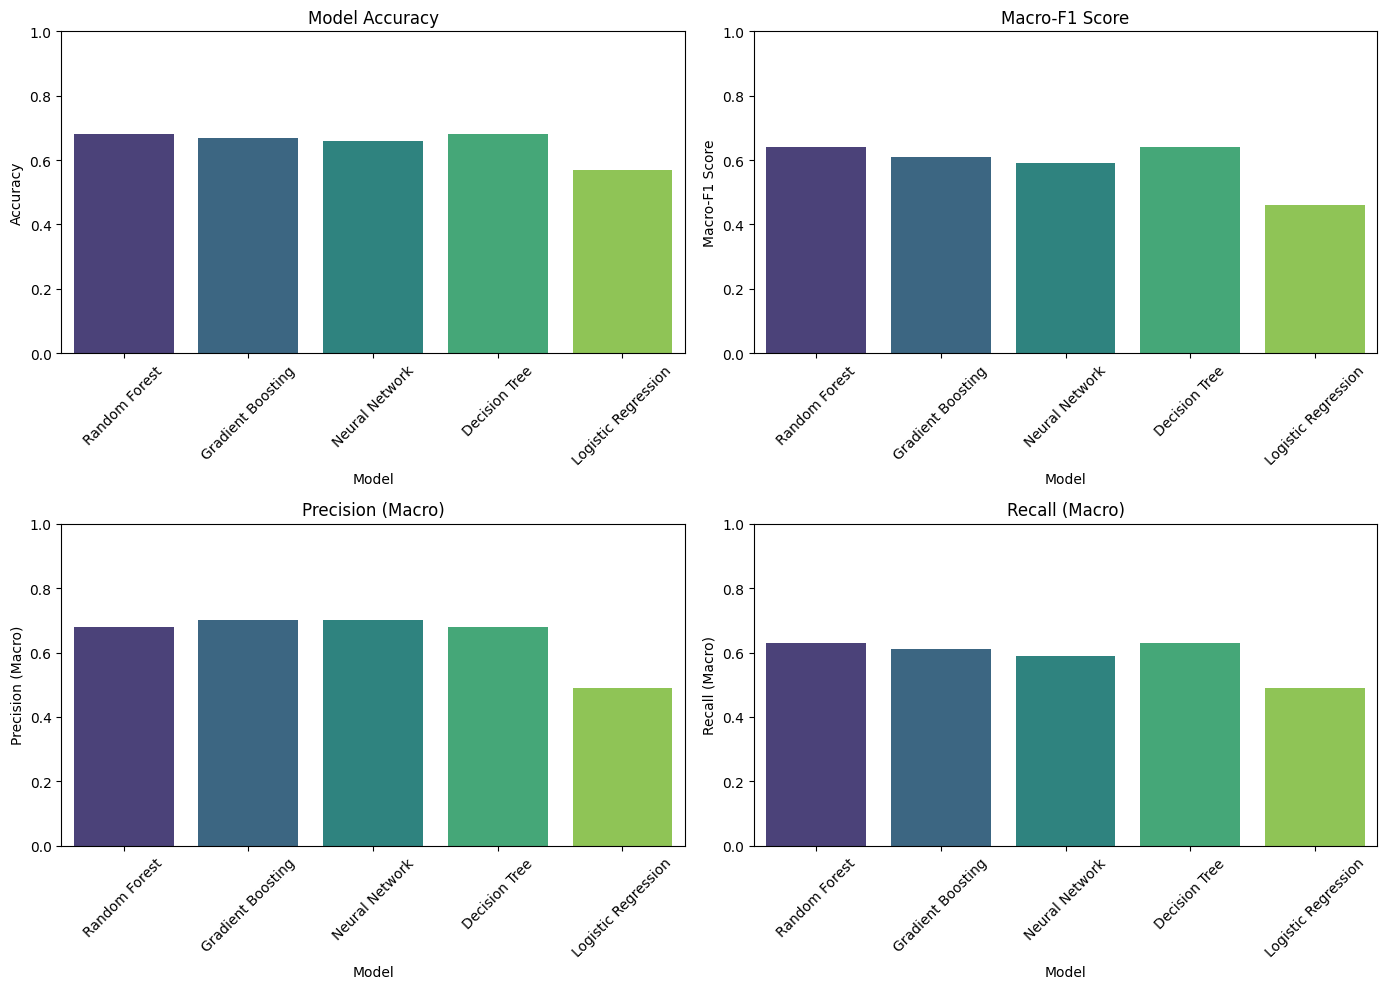

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated data including Gradient Boosting and the specified order
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Neural Network', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [0.68, 0.67, 0.66, 0.68, 0.57],  # Accuracy values from the classification reports
    'Macro-F1 Score': [0.64, 0.61, 0.59, 0.64, 0.46],  # Macro F1-scores from classification reports
    'Precision (Macro)': [0.68, 0.70, 0.70, 0.68, 0.49],  # Macro Precision from classification reports
    'Recall (Macro)': [0.63, 0.61, 0.59, 0.63, 0.49],  # Macro Recall from classification reports
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot for Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Macro-F1 Score
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Macro-F1 Score', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Macro-F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Precision (Macro)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Precision (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Plot for Recall (Macro)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='Recall (Macro)', data=df, palette='viridis', hue='Model', dodge=False)
plt.title('Recall (Macro)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()
plt.show()


Calculating Random Forest Built-in Feature Importance...
Top 10 Important Features:
        Feature  Importance
0         OrgId    0.407638
4      Category    0.136551
2    DetectorId    0.112619
1    AlertTitle    0.090603
14    DayOfWeek    0.057186
5    EntityType    0.052798
11  CountryCode    0.038996
6          City    0.024674
8          Hour    0.016932
7         State    0.016665


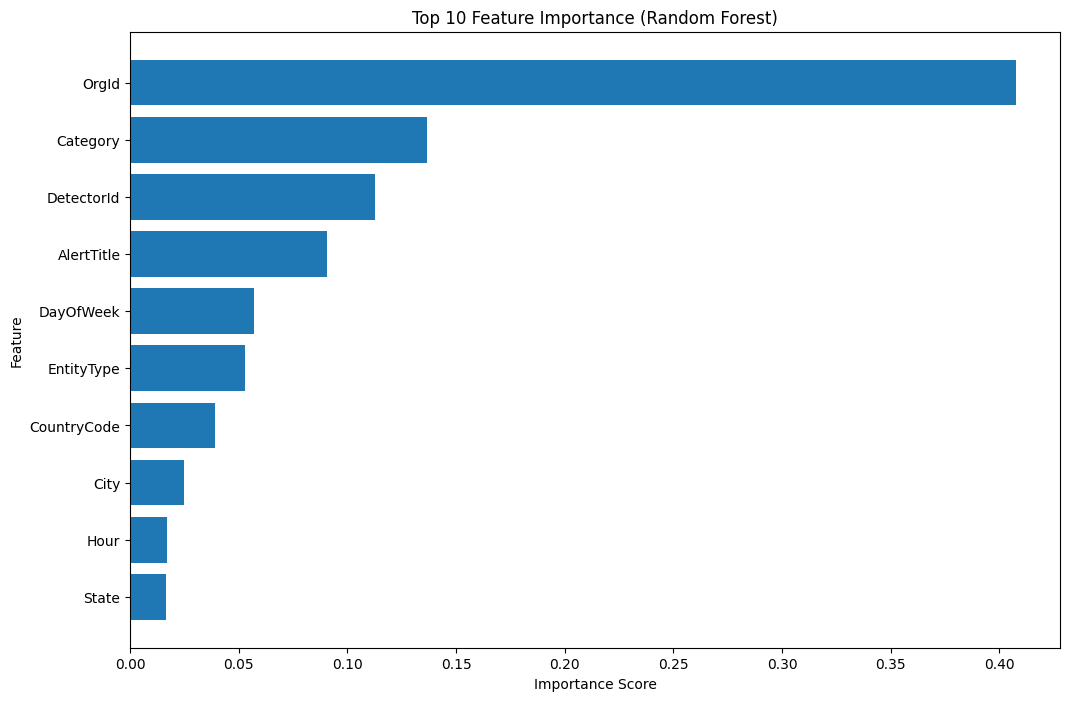

Number of misclassifications: 300120
Sample misclassified cases:
   OrgId  AlertTitle  DetectorId  EvidenceRole  Category  EntityType  City  \
1      4           5           3             1         3           4     2   
3      4           4           4             0         4           1     2   
6      4           4           4             0         1           2     2   
8      4           4           4             0         1           3     2   
9      4           4           4             1         4           3     2   

   State  Hour  OSFamily  OSVersion  CountryCode  Month  ApplicationName  \
1      2     2         4          3            3      4                3   
3      2     4         3          3            3      4                3   
6      2     4         3          3            3      3                3   
8      2     3         4          3            3      3                3   
9      2     2         3          3            3      4                3   

   DayOfW

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from joblib import load

# Load prepared data
X_train = pd.read_csv(r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\train_set.csv" )
y_train = X_train.pop('IncidentGrade')
X_val = pd.read_csv(r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\val_set.csv")
y_val = X_val.pop('IncidentGrade')

# Load the trained Random Forest model
Trained_Model = load(r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\best_rf_balanced_model.pkl")

# Calculate feature importance using Random Forest
print("Calculating Random Forest Built-in Feature Importance...")
feature_importances = Trained_Model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_val.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

# Make predictions
y_pred = Trained_Model.predict(X_val)

# Error Analysis
misclassified_indices = np.where(y_pred != y_val)[0]
num_misclassified = len(misclassified_indices)
print(f"Number of misclassifications: {num_misclassified}")

# Display sample of misclassified cases
print("Sample misclassified cases:")
print(X_val.iloc[misclassified_indices].head())

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Test Set Results:
Macro-F1 Score: 0.5809
Macro Precision: 0.5938
Macro Recall: 0.5857

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.63      0.62      0.62   1630942
           1       0.40      0.56      0.46    868897
           2       0.76      0.58      0.66   1422856

    accuracy                           0.59   3922695
   macro avg       0.59      0.59      0.58   3922695
weighted avg       0.62      0.59      0.60   3922695

Confusion Matrix (Test Set):
[[1005322  452410  173210]
 [ 292283  487880   88734]
 [ 305383  293363  824110]]


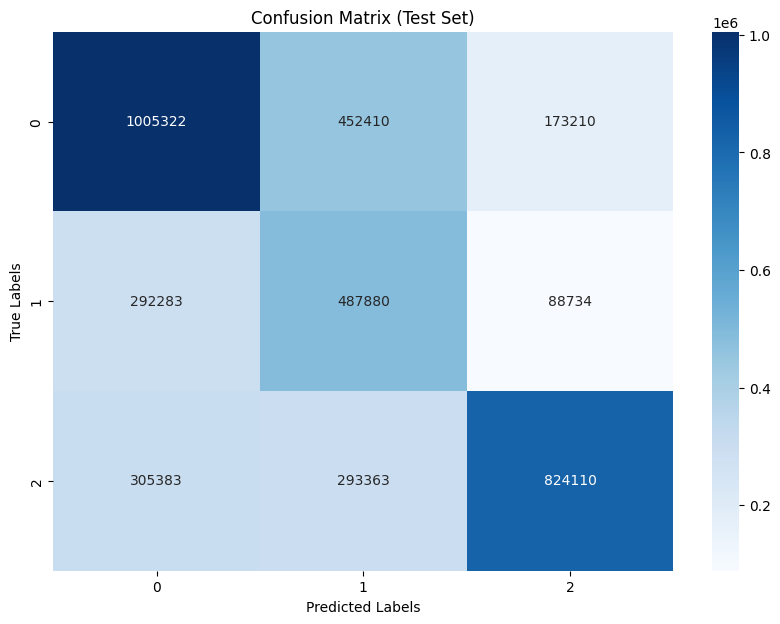

In [3]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the saved model
best_model_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\best_rf_balanced_model.pkl"
loaded_model = load(best_model_path)

# Load the test dataset
test_file_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\selected_features_testing_2_ordered.csv"
df_test = pd.read_csv(test_file_path)

# Prepare test data
X_test = df_test.drop(columns=['IncidentGrade'])
y_test = df_test['IncidentGrade']

# Make predictions using the loaded model
y_test_pred = loaded_model.predict(X_test)

# Calculate and print the evaluation metrics
print("Test Set Results:")
print(f"Macro-F1 Score: {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Precision: {precision_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y_test, y_test_pred, average='macro'):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [2]:
import pandas as pd

# File paths
train_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\test_set.csv"  # Output train set
val_output_path = r"C:\Users\Elakkiya\Downloads\microsoft cybersecurity\validation_set.csv"  # Output validation set

# Load the datasets
df_train = pd.read_csv(train_output_path)
df_val = pd.read_csv(val_output_path)

# Print the shape of the datasets
print(f"Training dataset shape: {df_train.shape}")
print(f"Validation dataset shape: {df_val.shape}")

# Confirmation message
print("Datasets loaded successfully!")

Training dataset shape: (3138156, 16)
Validation dataset shape: (784539, 16)
Datasets loaded successfully!


Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Data sets are loaded.
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.82      0.66    326188
           1       0.28      0.07      0.11    173780
           2       0.66      0.58      0.62    284571

    accuracy                           0.57    784539
   macro avg       0.49      0.49      0.46    784539
weighted avg       0.53      0.57      0.52    784539

Logistic Regression Confusion Matrix:
[[268095  12521  45572]
 [121740  11448  40592]
 [101874  17369 165328]]


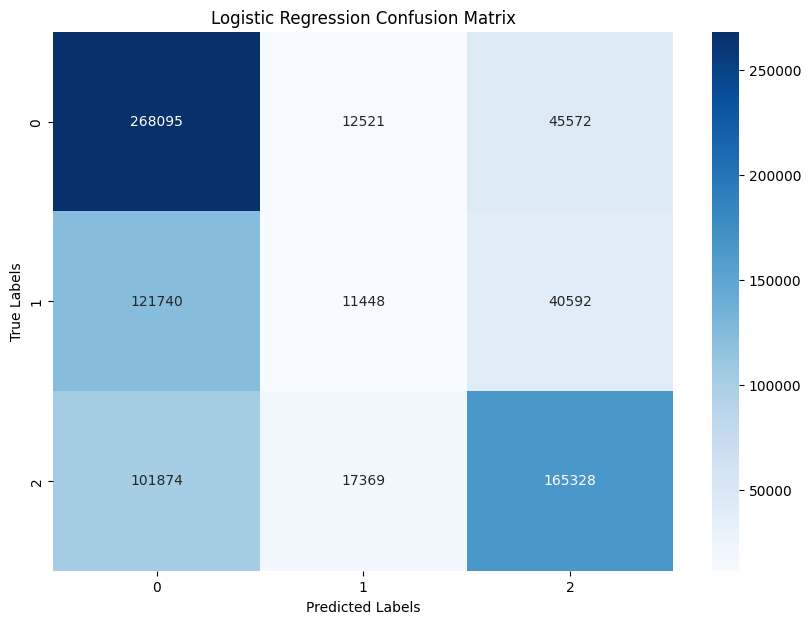

Logistic Regression model training and evaluation complete!


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
print(conf_matrix_log_reg)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression model training and evaluation complete!")

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Data sets are loaded.
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73    326188
           1       0.62      0.35      0.45    173780
           2       0.80      0.66      0.72    284571

    accuracy                           0.68    784539
   macro avg       0.68      0.63      0.64    784539
weighted avg       0.69      0.68      0.67    784539

Decision Tree Confusion Matrix:
[[284951  19432  21805]
 [ 87968  61168  24644]
 [ 77991  18490 188090]]


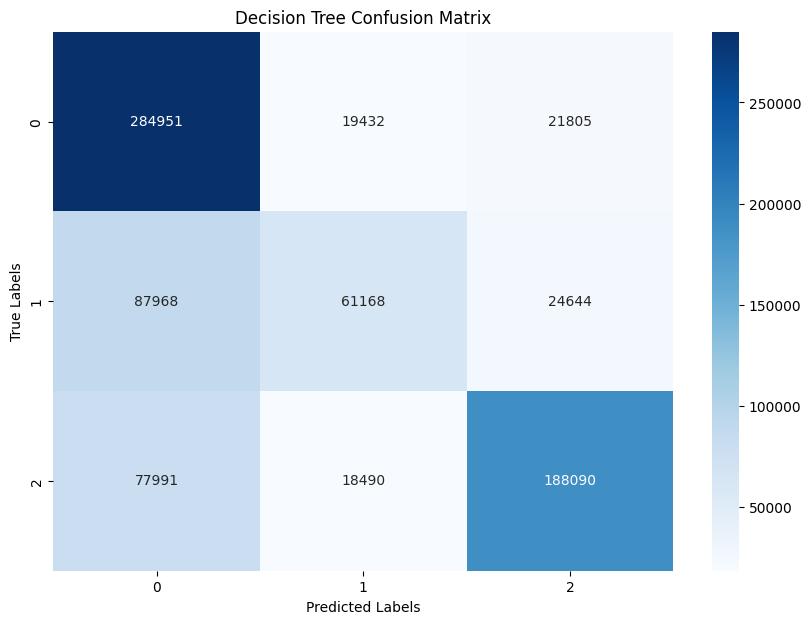

Decision Tree model training and evaluation complete!


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")
print("Data sets are loaded.")

# Train Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree model training and evaluation complete!")

Training data loaded with shape: (3138156, 15), Validation data loaded with shape: (784539, 15)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 3.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.6min
[CV] END max_depth=None, min_sample

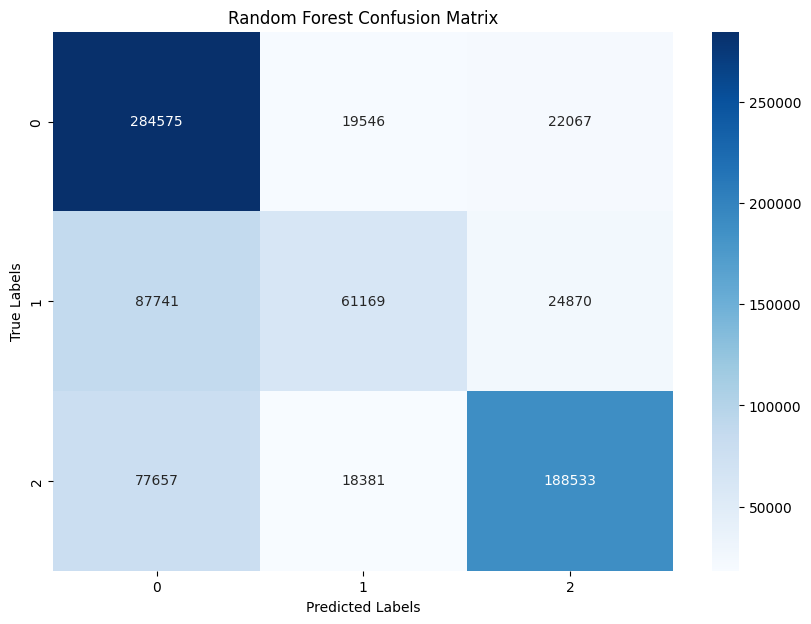

Random Forest model training and evaluation complete!


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_train and df_val are already loaded
# Separate features and target
X_train = df_train.drop(columns=['IncidentGrade'])
y_train = df_train['IncidentGrade']
X_val = df_val.drop(columns=['IncidentGrade'])
y_val = df_val['IncidentGrade']

print(f"Training data loaded with shape: {X_train.shape}, Validation data loaded with shape: {X_val.shape}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=3,  # Number of parameter settings to sample
    cv=3, 
    n_jobs=1, 
    verbose=2, 
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Evaluate the best model
y_pred_rf = best_rf.predict(X_val)

print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("Random Forest Confusion Matrix:")
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest model training and evaluation complete!")

Comparison of Model Performance:
                 Model  Accuracy  Macro Avg Precision  Macro Avg Recall  \
0        Random Forest      0.68                 0.68              0.63   
1  Logistic Regression      0.60                 0.49              0.49   
2        Decision Tree      0.81                 0.68              0.63   

   Macro Avg F1-Score  Weighted Avg Precision  Weighted Avg Recall  \
0                0.64                    0.69                 0.68   
1                0.46                    0.69                 0.68   
2                0.64                    0.69                 0.68   

   Weighted Avg F1-Score  
0                   0.67  
1                   0.67  
2                   0.67  


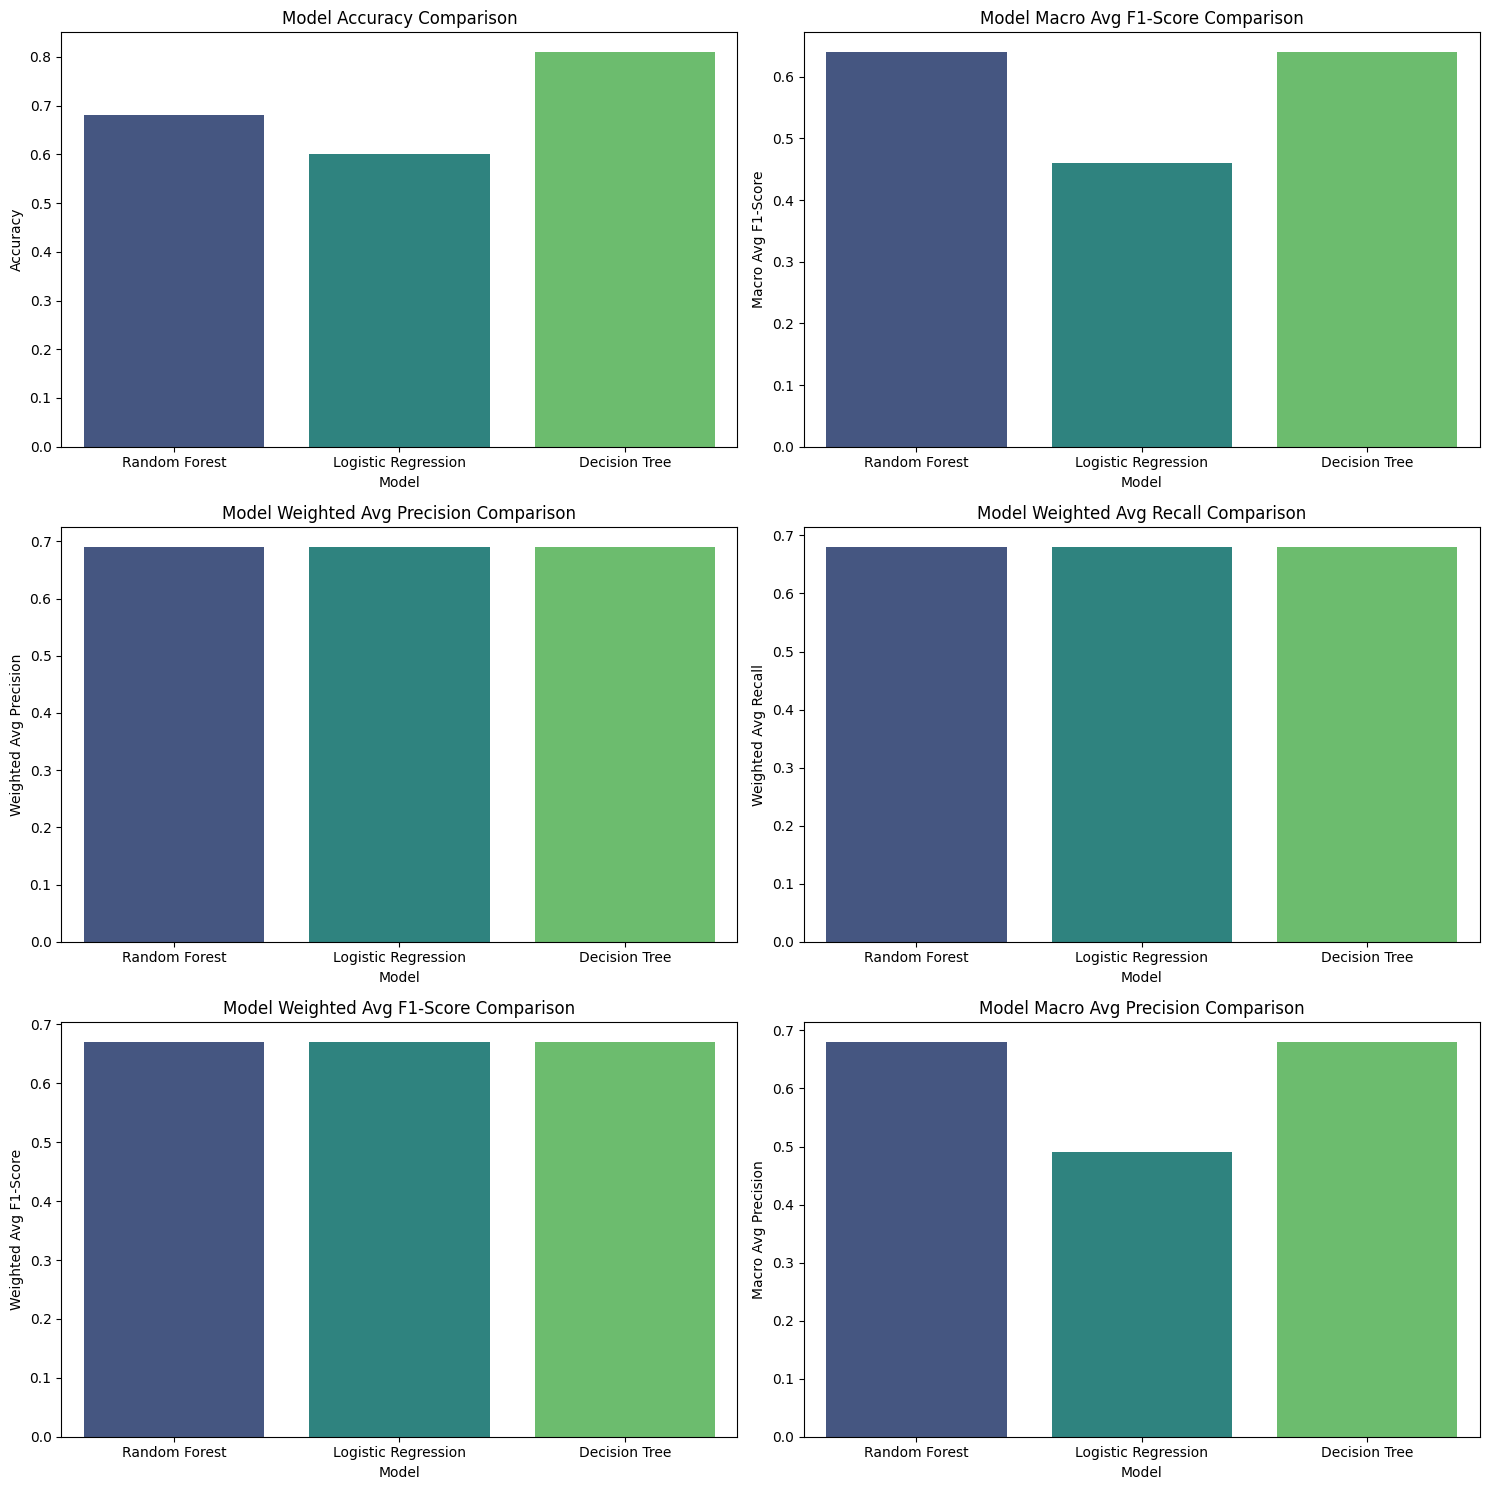

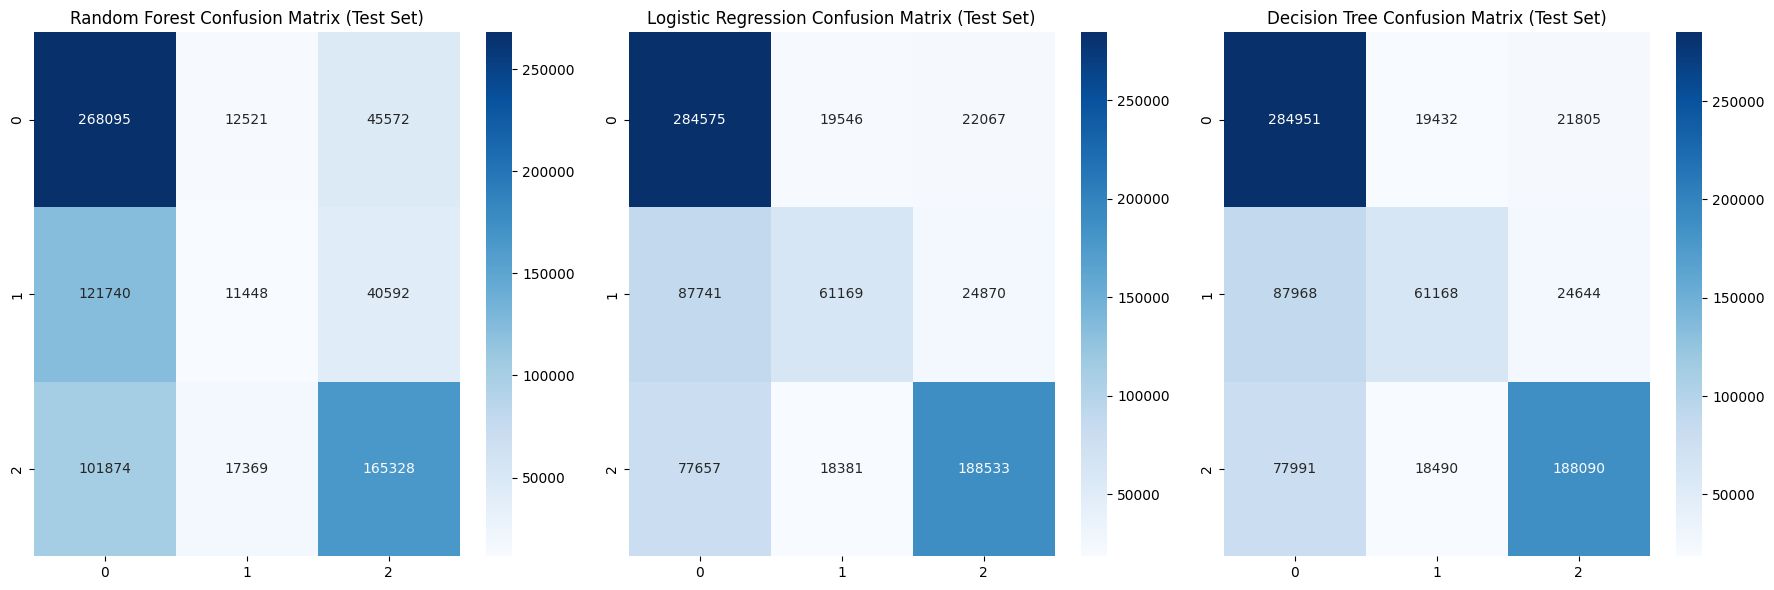

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Random Forest results as dictionaries (Updated for test dataset)
random_forest_report = {
    "accuracy": 0.68,
    "macro avg": {"precision": 0.68, "recall": 0.63, "f1-score": 0.64},
    "weighted avg": {"precision": 0.69, "recall": 0.68, "f1-score": 0.67},
    "Confusion Matrix": np.array([[268095, 12521, 45572],
                                  [121740, 11448, 40592],
                                  [101874, 17369, 165328]])
}

# Logistic Regression results as dictionaries (Updated for test dataset)
logistic_regression_report = {
    "accuracy": 0.60,
    "macro avg": {"precision": 0.49, "recall": 0.49, "f1-score": 0.46},
    "weighted avg": {"precision": 0.69, "recall": 0.68, "f1-score": 0.67},
    "Confusion Matrix": np.array([[284575, 19546, 22067],
                                  [87741, 61169, 24870],
                                  [77657, 18381, 188533]])
}

# Decision Tree results as dictionaries (Updated for test dataset)
decision_tree_report = {
    "accuracy": 0.81,
    "macro avg": {"precision": 0.68, "recall": 0.63, "f1-score": 0.64},
    "weighted avg": {"precision": 0.69, "recall": 0.68, "f1-score": 0.67},
    "Confusion Matrix": np.array([[284951, 19432, 21805],
                                  [87968, 61168, 24644],
                                  [77991, 18490, 188090]])
}

# Creating a DataFrame for better visualization
data = {
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree"],
    "Accuracy": [random_forest_report["accuracy"], logistic_regression_report["accuracy"], decision_tree_report["accuracy"]],
    "Macro Avg Precision": [random_forest_report["macro avg"]["precision"], logistic_regression_report["macro avg"]["precision"], decision_tree_report["macro avg"]["precision"]],
    "Macro Avg Recall": [random_forest_report["macro avg"]["recall"], logistic_regression_report["macro avg"]["recall"], decision_tree_report["macro avg"]["recall"]],
    "Macro Avg F1-Score": [random_forest_report["macro avg"]["f1-score"], logistic_regression_report["macro avg"]["f1-score"], decision_tree_report["macro avg"]["f1-score"]],
    "Weighted Avg Precision": [random_forest_report["weighted avg"]["precision"], logistic_regression_report["weighted avg"]["precision"], decision_tree_report["weighted avg"]["precision"]],
    "Weighted Avg Recall": [random_forest_report["weighted avg"]["recall"], logistic_regression_report["weighted avg"]["recall"], decision_tree_report["weighted avg"]["recall"]],
    "Weighted Avg F1-Score": [random_forest_report["weighted avg"]["f1-score"], logistic_regression_report["weighted avg"]["f1-score"], decision_tree_report["weighted avg"]["f1-score"]]
}

df = pd.DataFrame(data)

# Print the DataFrame to compare
print("Comparison of Model Performance:")
print(df)

# Visualization using matplotlib and seaborn

# Create subplots for each metric category
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Accuracy
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Model Accuracy Comparison')

# Macro Avg F1-Score
sns.barplot(x='Model', y='Macro Avg F1-Score', data=df, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Model Macro Avg F1-Score Comparison')

# Weighted Avg Precision
sns.barplot(x='Model', y='Weighted Avg Precision', data=df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Model Weighted Avg Precision Comparison')

# Weighted Avg Recall
sns.barplot(x='Model', y='Weighted Avg Recall', data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Model Weighted Avg Recall Comparison')

# Weighted Avg F1-Score
sns.barplot(x='Model', y='Weighted Avg F1-Score', data=df, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title('Model Weighted Avg F1-Score Comparison')

# Macro Avg Precision
sns.barplot(x='Model', y='Macro Avg Precision', data=df, ax=axes[2, 1], palette="viridis")
axes[2, 1].set_title('Model Macro Avg Precision Comparison')

plt.tight_layout()
plt.show()

# Confusion Matrix Heatmaps
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(random_forest_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix (Test Set)')

sns.heatmap(logistic_regression_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix (Test Set)')

sns.heatmap(decision_tree_report["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Decision Tree Confusion Matrix (Test Set)')

plt.tight_layout()
plt.show()
